In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_excel("Decision Tree & Random Forest Problem_ Data Set.xlsx")

In [37]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1.0,debt_consolidation,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0
1,1.0,credit_card,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0
2,1.0,debt_consolidation,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0
3,1.0,debt_consolidation,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0
4,1.0,credit_card,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,0.0


In [38]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   float64
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   float64
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   float64
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   float64
 11  delinq.2yrs        9578 non-null   float64
 12  pub.rec            9578 non-null   float64
 13  not.fully.paid     9578 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.0+ MB


In [40]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [41]:
df['not.fully.paid'].value_counts()

0.0    8045
1.0    1533
Name: not.fully.paid, dtype: int64

In [42]:
df['credit.policy'].value_counts()

1.0    7710
0.0    1868
Name: credit.policy, dtype: int64

<AxesSubplot:xlabel='int.rate', ylabel='revol.bal'>

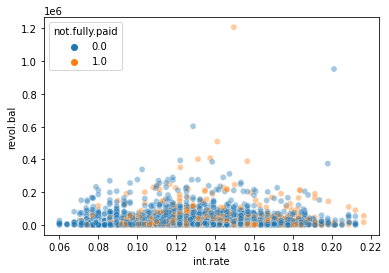

In [43]:
sns.scatterplot(x = df['int.rate'], y = df['revol.bal'], hue = df['not.fully.paid'],alpha=0.4)

In [44]:
# sns.pairplot(df,hue = 'credit.policy',corner=True)

In [45]:
df[df['credit.policy'] == 0]['not.fully.paid'].value_counts()

0.0    1349
1.0     519
Name: not.fully.paid, dtype: int64

In [46]:
df[df['credit.policy'] == 1]['not.fully.paid'].value_counts()

0.0    6696
1.0    1014
Name: not.fully.paid, dtype: int64

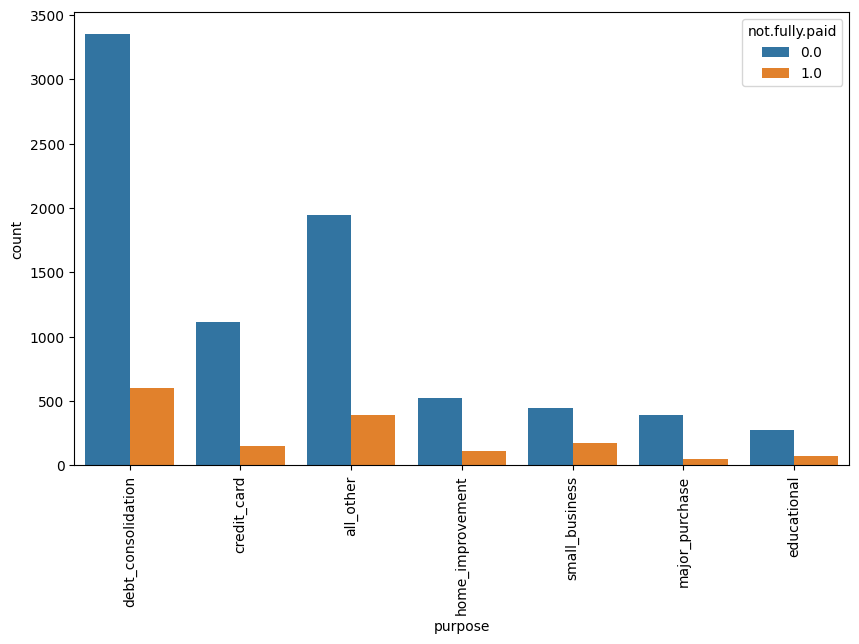

In [47]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(x = df['purpose'], hue = df['not.fully.paid'])
plt.xticks(rotation = 90);

In [48]:
df_nw = pd.get_dummies(df, drop_first=True)

In [49]:
df_nw.head(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0.0,0,1,0,0,0,0
3,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0.0,0,1,0,0,0,0
4,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,0.0,1,0,0,0,0,0


In [57]:
df_nw.corr()['not.fully.paid'].sort_values()[:-1]

credit.policy                -0.158119
fico                         -0.149666
purpose_credit_card          -0.047136
log.annual.inc               -0.033439
days.with.cr.line            -0.029237
purpose_major_purchase       -0.028580
purpose_debt_consolidation   -0.017543
purpose_home_improvement      0.007272
delinq.2yrs                   0.008881
purpose_educational           0.021609
dti                           0.037362
pub.rec                       0.048634
installment                   0.049955
revol.bal                     0.053699
revol.util                    0.082088
purpose_small_business        0.084460
inq.last.6mths                0.149452
int.rate                      0.159552
Name: not.fully.paid, dtype: float64

In [66]:
df_pair = df_nw[['pub.rec','installment','revol.bal',
                 'revol.util','purpose_small_business','inq.last.6mths','int.rate','not.fully.paid']]

In [68]:
# sns.pairplot(df_pair,hue='not.fully.paid', corner=True)

<AxesSubplot:>

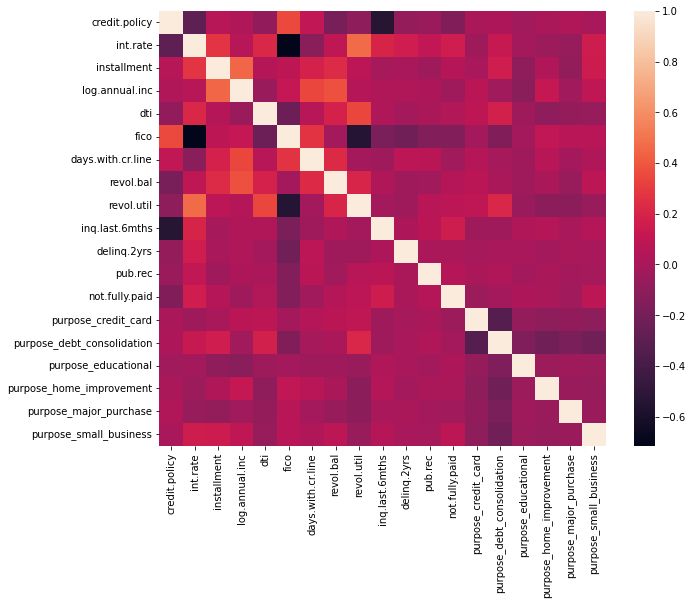

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df_nw.corr())

In [58]:
X = df_nw.drop('not.fully.paid', axis =1)
y = df_nw['not.fully.paid']

In [60]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0.0,0.0,0.0,0,1,0,0,0,0
1,1.0,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0.0,0.0,0.0,1,0,0,0,0,0
2,1.0,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1.0,0.0,0.0,0,1,0,0,0,0
3,1.0,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1.0,0.0,0.0,0,1,0,0,0,0
4,1.0,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0.0,1.0,0.0,1,0,0,0,0,0


In [61]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: not.fully.paid, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier()

In [74]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
base_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [77]:
confusion_matrix(y_test,base_pred)

array([[1347,  276],
       [ 223,   70]], dtype=int64)

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


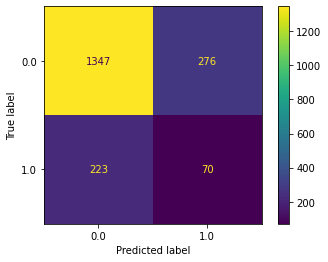

In [78]:
plot_confusion_matrix(model,X_test,y_test)

In [79]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1623
         1.0       0.20      0.24      0.22       293

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.76      0.74      0.75      1916



In [80]:
model.feature_importances_

array([0.02585232, 0.10149789, 0.12398002, 0.11440268, 0.09925504,
       0.07598685, 0.13251843, 0.11953194, 0.09833783, 0.04071368,
       0.01120361, 0.01204307, 0.00536106, 0.01197202, 0.00568331,
       0.00766487, 0.00454524, 0.00945013])

In [81]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
credit.policy,0.025852
int.rate,0.101498
installment,0.123980
log.annual.inc,0.114403
dti,0.099255
fico,0.075987
days.with.cr.line,0.132518
revol.bal,0.119532
revol.util,0.098338
inq.last.6mths,0.040714


In [82]:
from sklearn.tree import plot_tree

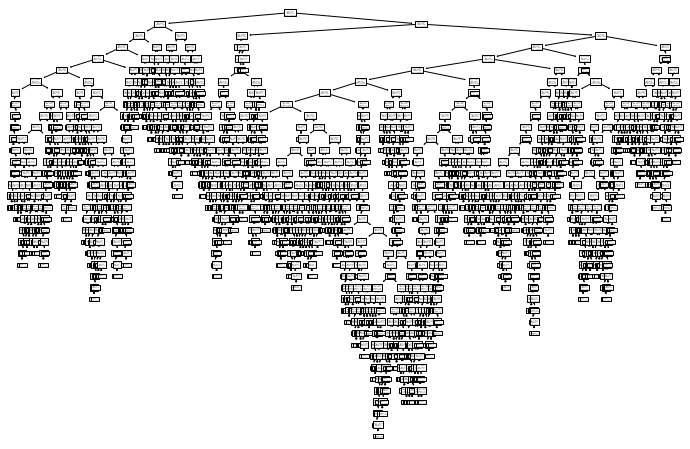

In [83]:
plt.figure(figsize=(12,8))
plot_tree(model);

# better not to plot big trees

In [84]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [92]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1623
         1.0       0.00      0.00      0.00       293

    accuracy                           0.85      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.72      0.85      0.78      1916





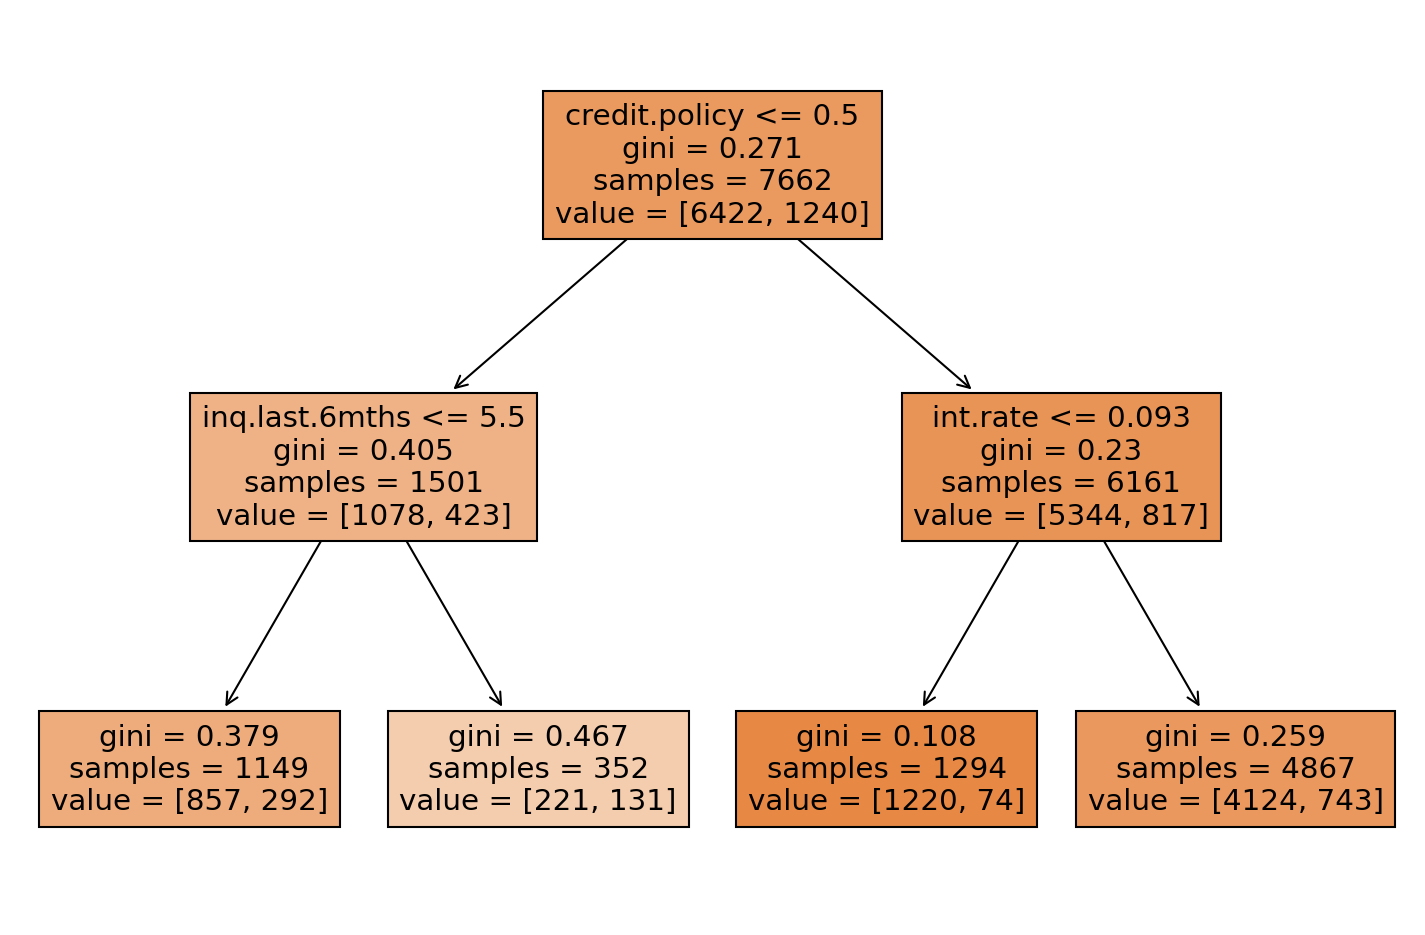

In [93]:
report_model(pruned_tree)

In [94]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1623
         1.0       0.00      0.00      0.00       293

    accuracy                           0.85      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.72      0.85      0.78      1916





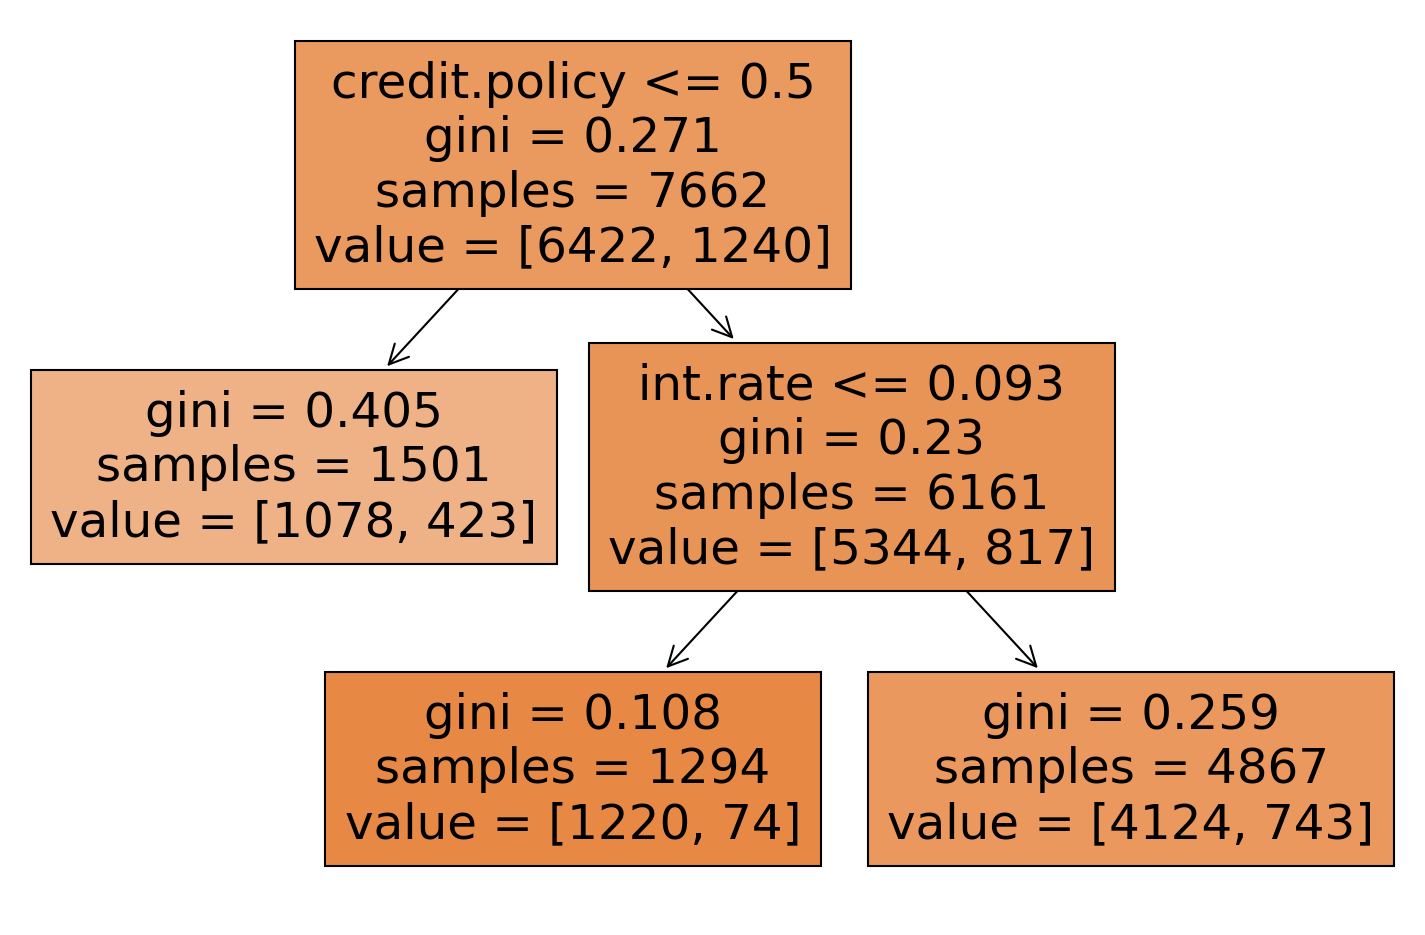

In [95]:
report_model(pruned_tree)

In [96]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1623
         1.0       0.15      0.18      0.17       293

    accuracy                           0.72      1916
   macro avg       0.50      0.50      0.50      1916
weighted avg       0.74      0.72      0.73      1916





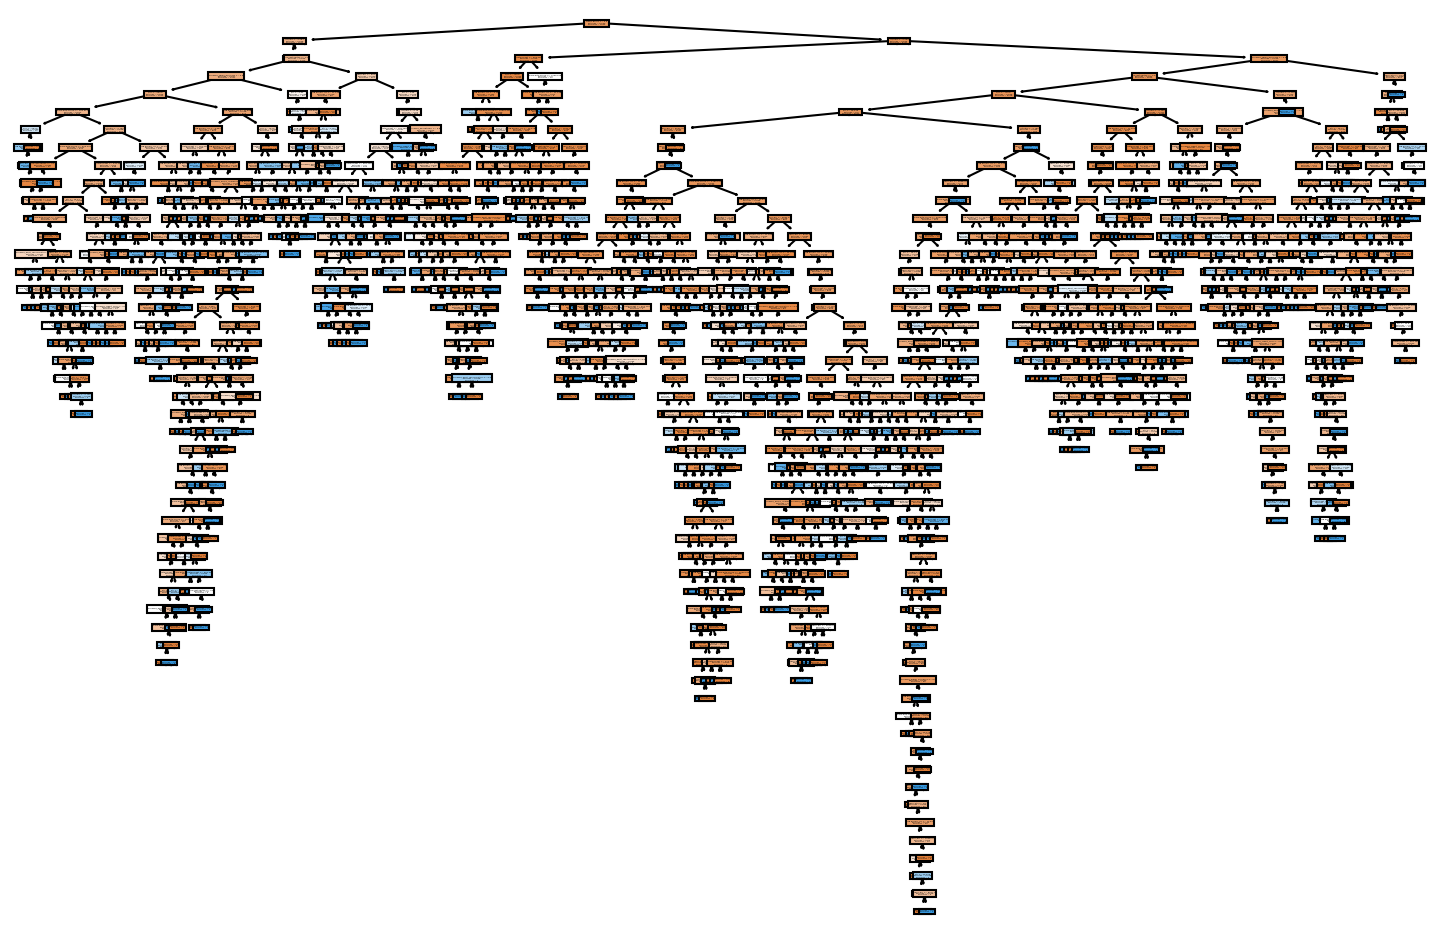

In [97]:
report_model(entropy_tree)

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
model = RandomForestClassifier(n_estimators=10,random_state=101) # max_features='auto'/ 'sqrt'

In [123]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [124]:
preds = model.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [126]:
confusion_matrix(y_test,preds)

array([[1594,   29],
       [ 283,   10]], dtype=int64)

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


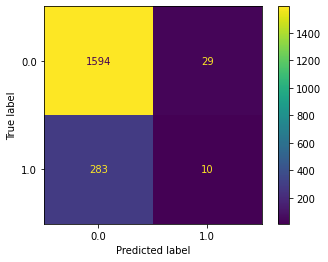

In [127]:
plot_confusion_matrix(model,X_test,y_test)

In [128]:
model.feature_importances_

array([0.01801592, 0.10121618, 0.11422105, 0.11093241, 0.10745726,
       0.07886073, 0.11331701, 0.11067636, 0.12009482, 0.05307043,
       0.01677773, 0.00861829, 0.00707956, 0.01243767, 0.00570078,
       0.00718391, 0.0030762 , 0.01126369])

In [129]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      1623
         1.0       0.26      0.03      0.06       293

    accuracy                           0.84      1916
   macro avg       0.55      0.51      0.49      1916
weighted avg       0.76      0.84      0.78      1916



In [120]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

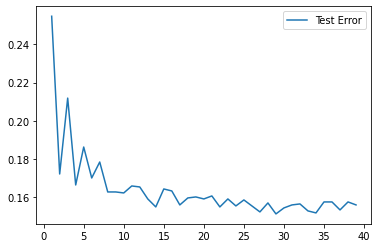

In [121]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
n_estimators=[64,100,128,200,400,600,800,1000]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [192]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [193]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [194]:
grid.fit(X_train,y_train)

C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\ensemble\_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only availab

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200, 400, 600, 800,
                                          1000],
                         'oob_score': [True, False]})

In [195]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [196]:
predictions = grid.predict(X_test)

In [197]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1221
         1.0       0.75      0.01      0.03       216

    accuracy                           0.85      1437
   macro avg       0.80      0.51      0.47      1437
weighted avg       0.84      0.85      0.79      1437



C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


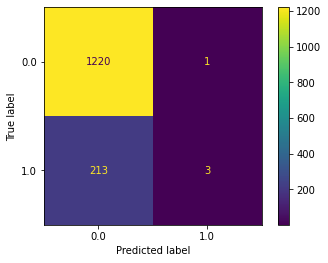

In [198]:
plot_confusion_matrix(grid,X_test,y_test)

In [199]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

True

In [200]:
# With underscore, reports back fitted attribute of oob_score
# grid.best_estimator_.oob_score_

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) 
    errors.append(err)
    misclassifications.append(n_missed)

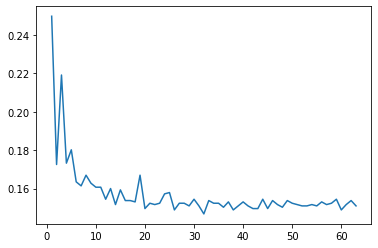

In [203]:
plt.plot(range(1,64),errors)

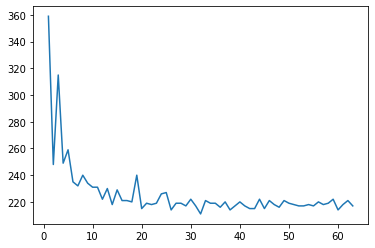

In [204]:
plt.plot(range(1,64),misclassifications)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [206]:
from sklearn.ensemble import AdaBoostClassifier

In [207]:
model = AdaBoostClassifier(n_estimators=1)

In [208]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [209]:
predictions = model.predict(X_test)

In [210]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [211]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1221
         1.0       0.00      0.00      0.00       216

    accuracy                           0.85      1437
   macro avg       0.42      0.50      0.46      1437
weighted avg       0.72      0.85      0.78      1437



C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Riyaz\anaconda3\envs\New_Python_Environment\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [212]:
model.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [213]:
model.feature_importances_.argmax()

0

In [214]:
X.columns[0]

'credit.policy'

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

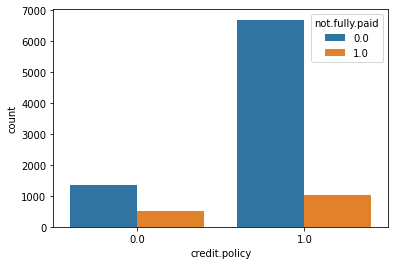

In [215]:
sns.countplot(data=df_nw,x='credit.policy',hue='not.fully.paid')

In [216]:
len(X.columns)

18

In [217]:
error_rates = []

for n in range(1,19):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

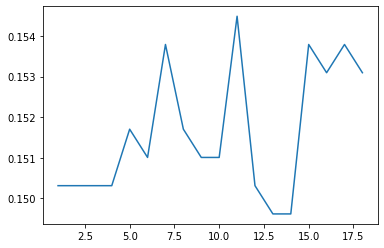

In [218]:
plt.plot(range(1,19),error_rates)

In [219]:
model

AdaBoostClassifier(n_estimators=18)

In [220]:
model.feature_importances_

array([0.11111111, 0.11111111, 0.11111111, 0.16666667, 0.        ,
       0.05555556, 0.        , 0.05555556, 0.11111111, 0.11111111,
       0.        , 0.05555556, 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.05555556])

In [221]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [222]:
feats

,Importance
credit.policy,0.111111
int.rate,0.111111
installment,0.111111
log.annual.inc,0.166667
dti,0.000000
fico,0.055556
days.with.cr.line,0.000000
revol.bal,0.055556
revol.util,0.111111
inq.last.6mths,0.111111


In [223]:
imp_feats = feats[feats['Importance']>0]

In [224]:
imp_feats

,Importance
credit.policy,0.111111
int.rate,0.111111
installment,0.111111
log.annual.inc,0.166667
fico,0.055556
revol.bal,0.055556
revol.util,0.111111
inq.last.6mths,0.111111
pub.rec,0.055556
purpose_credit_card,0.055556


In [225]:
imp_feats = imp_feats.sort_values("Importance")

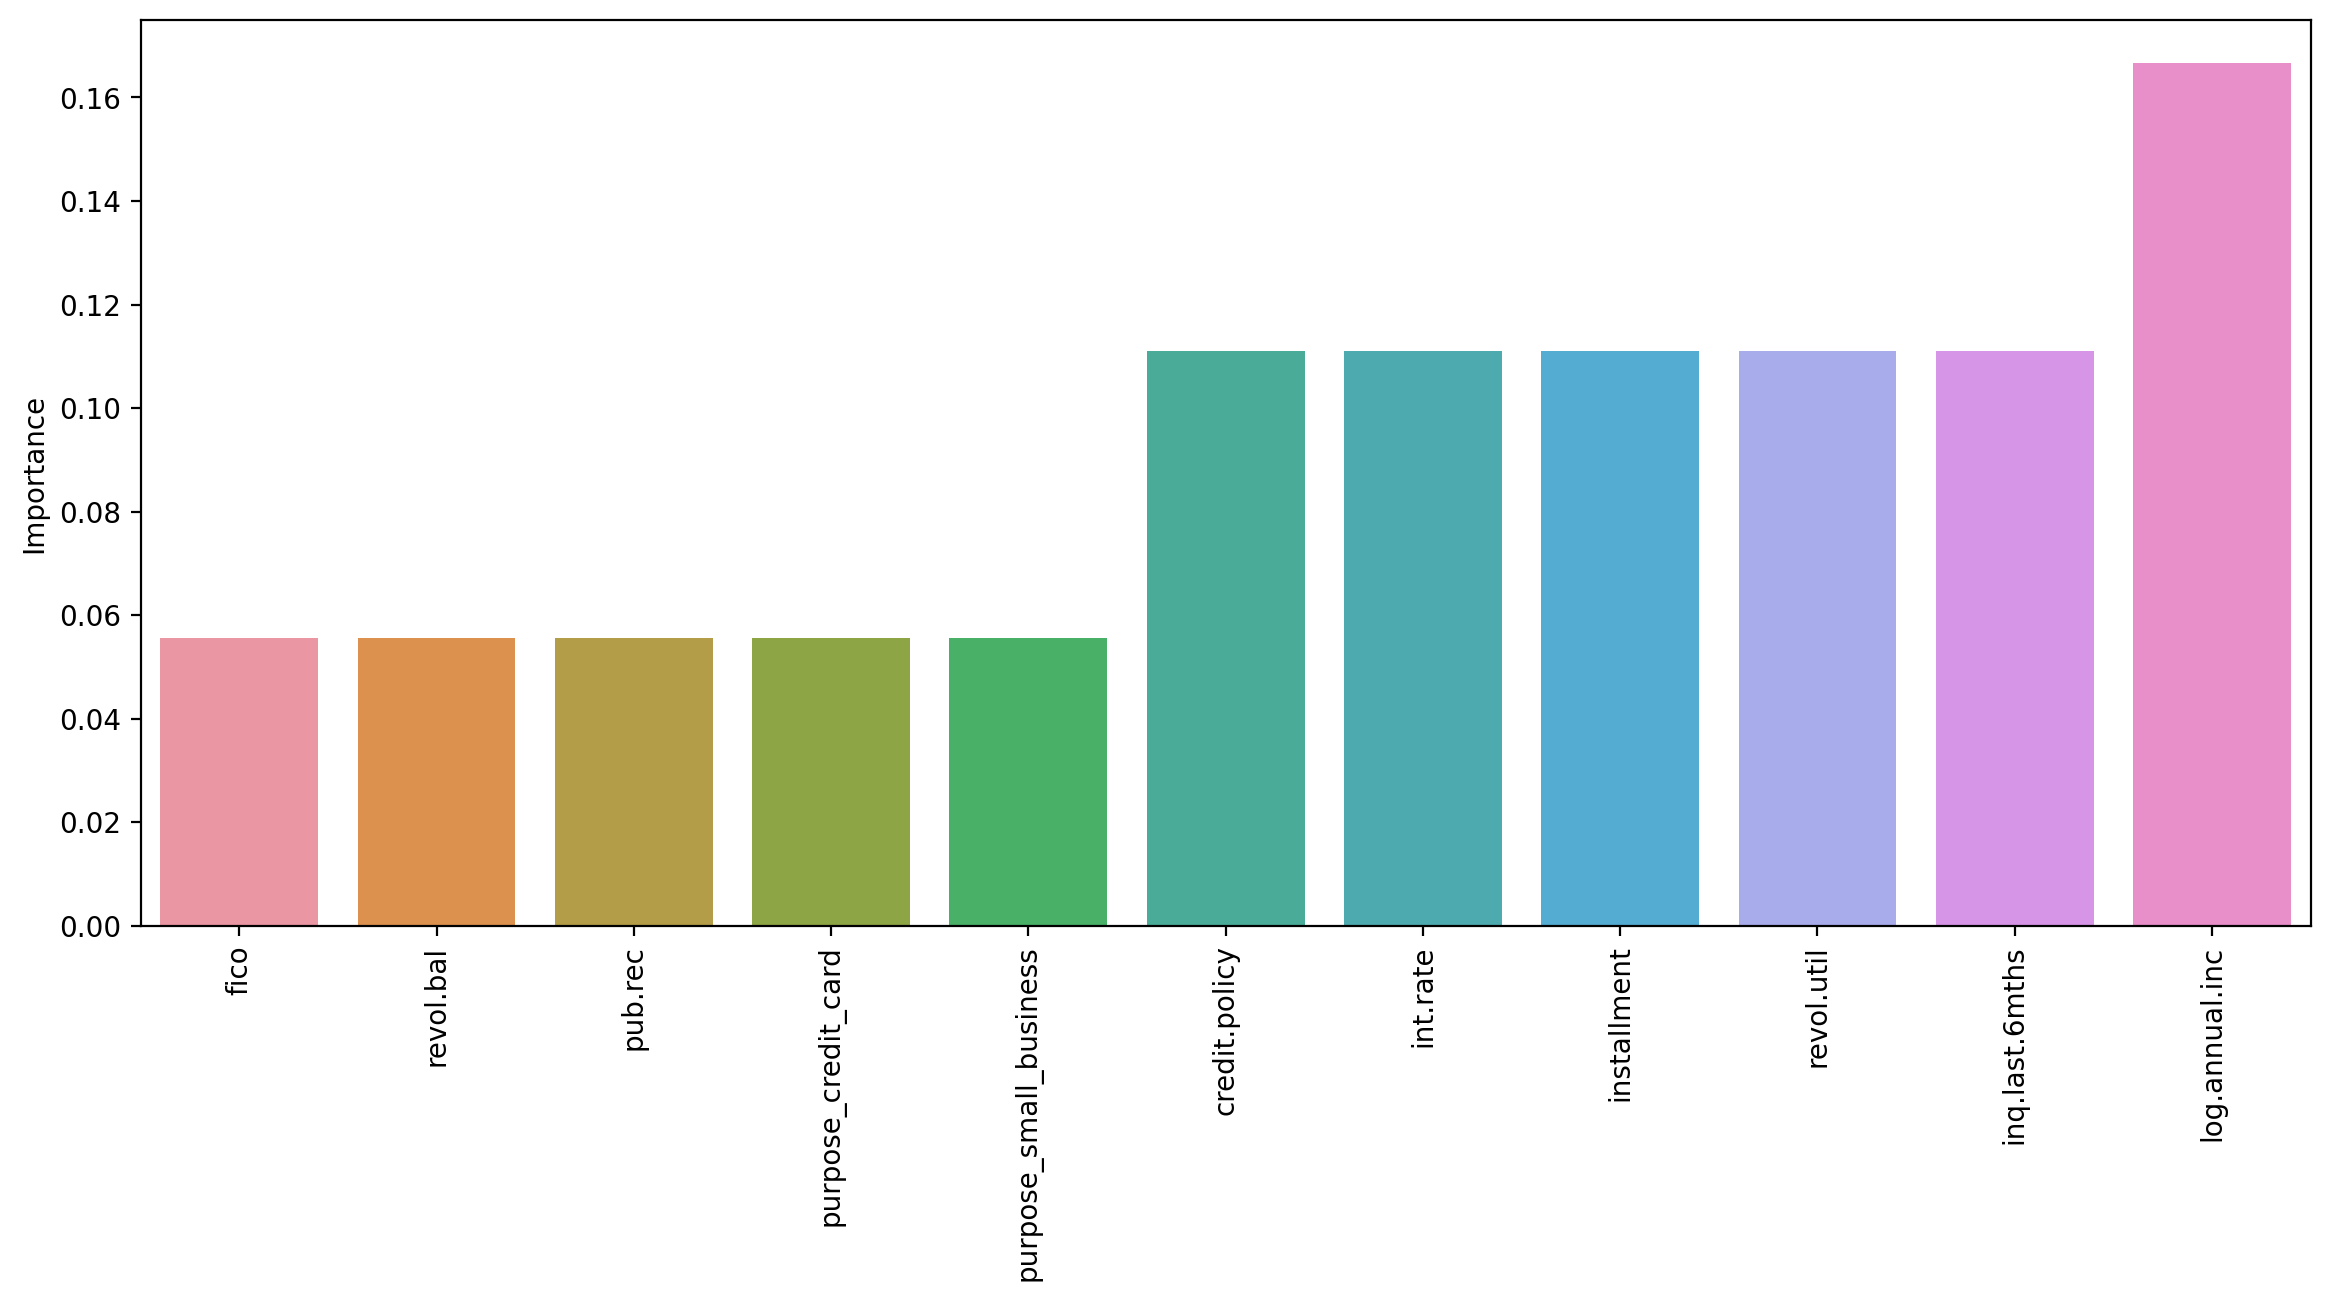

In [226]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [227]:
from sklearn.ensemble import GradientBoostingClassifier

In [228]:
from sklearn.model_selection import GridSearchCV

In [229]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [230]:
gb_model = GradientBoostingClassifier()

In [231]:
grid = GridSearchCV(gb_model,param_grid)

In [232]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [233]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [234]:
predictions = grid.predict(X_test)

In [235]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [236]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1221
         1.0       0.00      0.00      0.00       216

    accuracy                           0.85      1437
   macro avg       0.42      0.50      0.46      1437
weighted avg       0.72      0.85      0.78      1437



In [237]:
grid.best_estimator_.feature_importances_

array([0.25209881, 0.18347577, 0.09643333, 0.06445552, 0.00883667,
       0.08036342, 0.00653689, 0.03338185, 0.03618656, 0.1429262 ,
       0.        , 0.00625336, 0.        , 0.00341885, 0.00131472,
       0.0034015 , 0.00287516, 0.07804139])

In [238]:
feat_import = grid.best_estimator_.feature_importances_

In [239]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [240]:
imp_feats

,Importance
credit.policy,0.252099
int.rate,0.183476
installment,0.096433
log.annual.inc,0.064456
dti,0.008837
fico,0.080363
days.with.cr.line,0.006537
revol.bal,0.033382
revol.util,0.036187
inq.last.6mths,0.142926


In [241]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
credit.policy,0.252099
int.rate,0.183476
inq.last.6mths,0.142926
installment,0.096433
fico,0.080363
purpose_small_business,0.078041
log.annual.inc,0.064456
revol.util,0.036187
revol.bal,0.033382
dti,0.008837


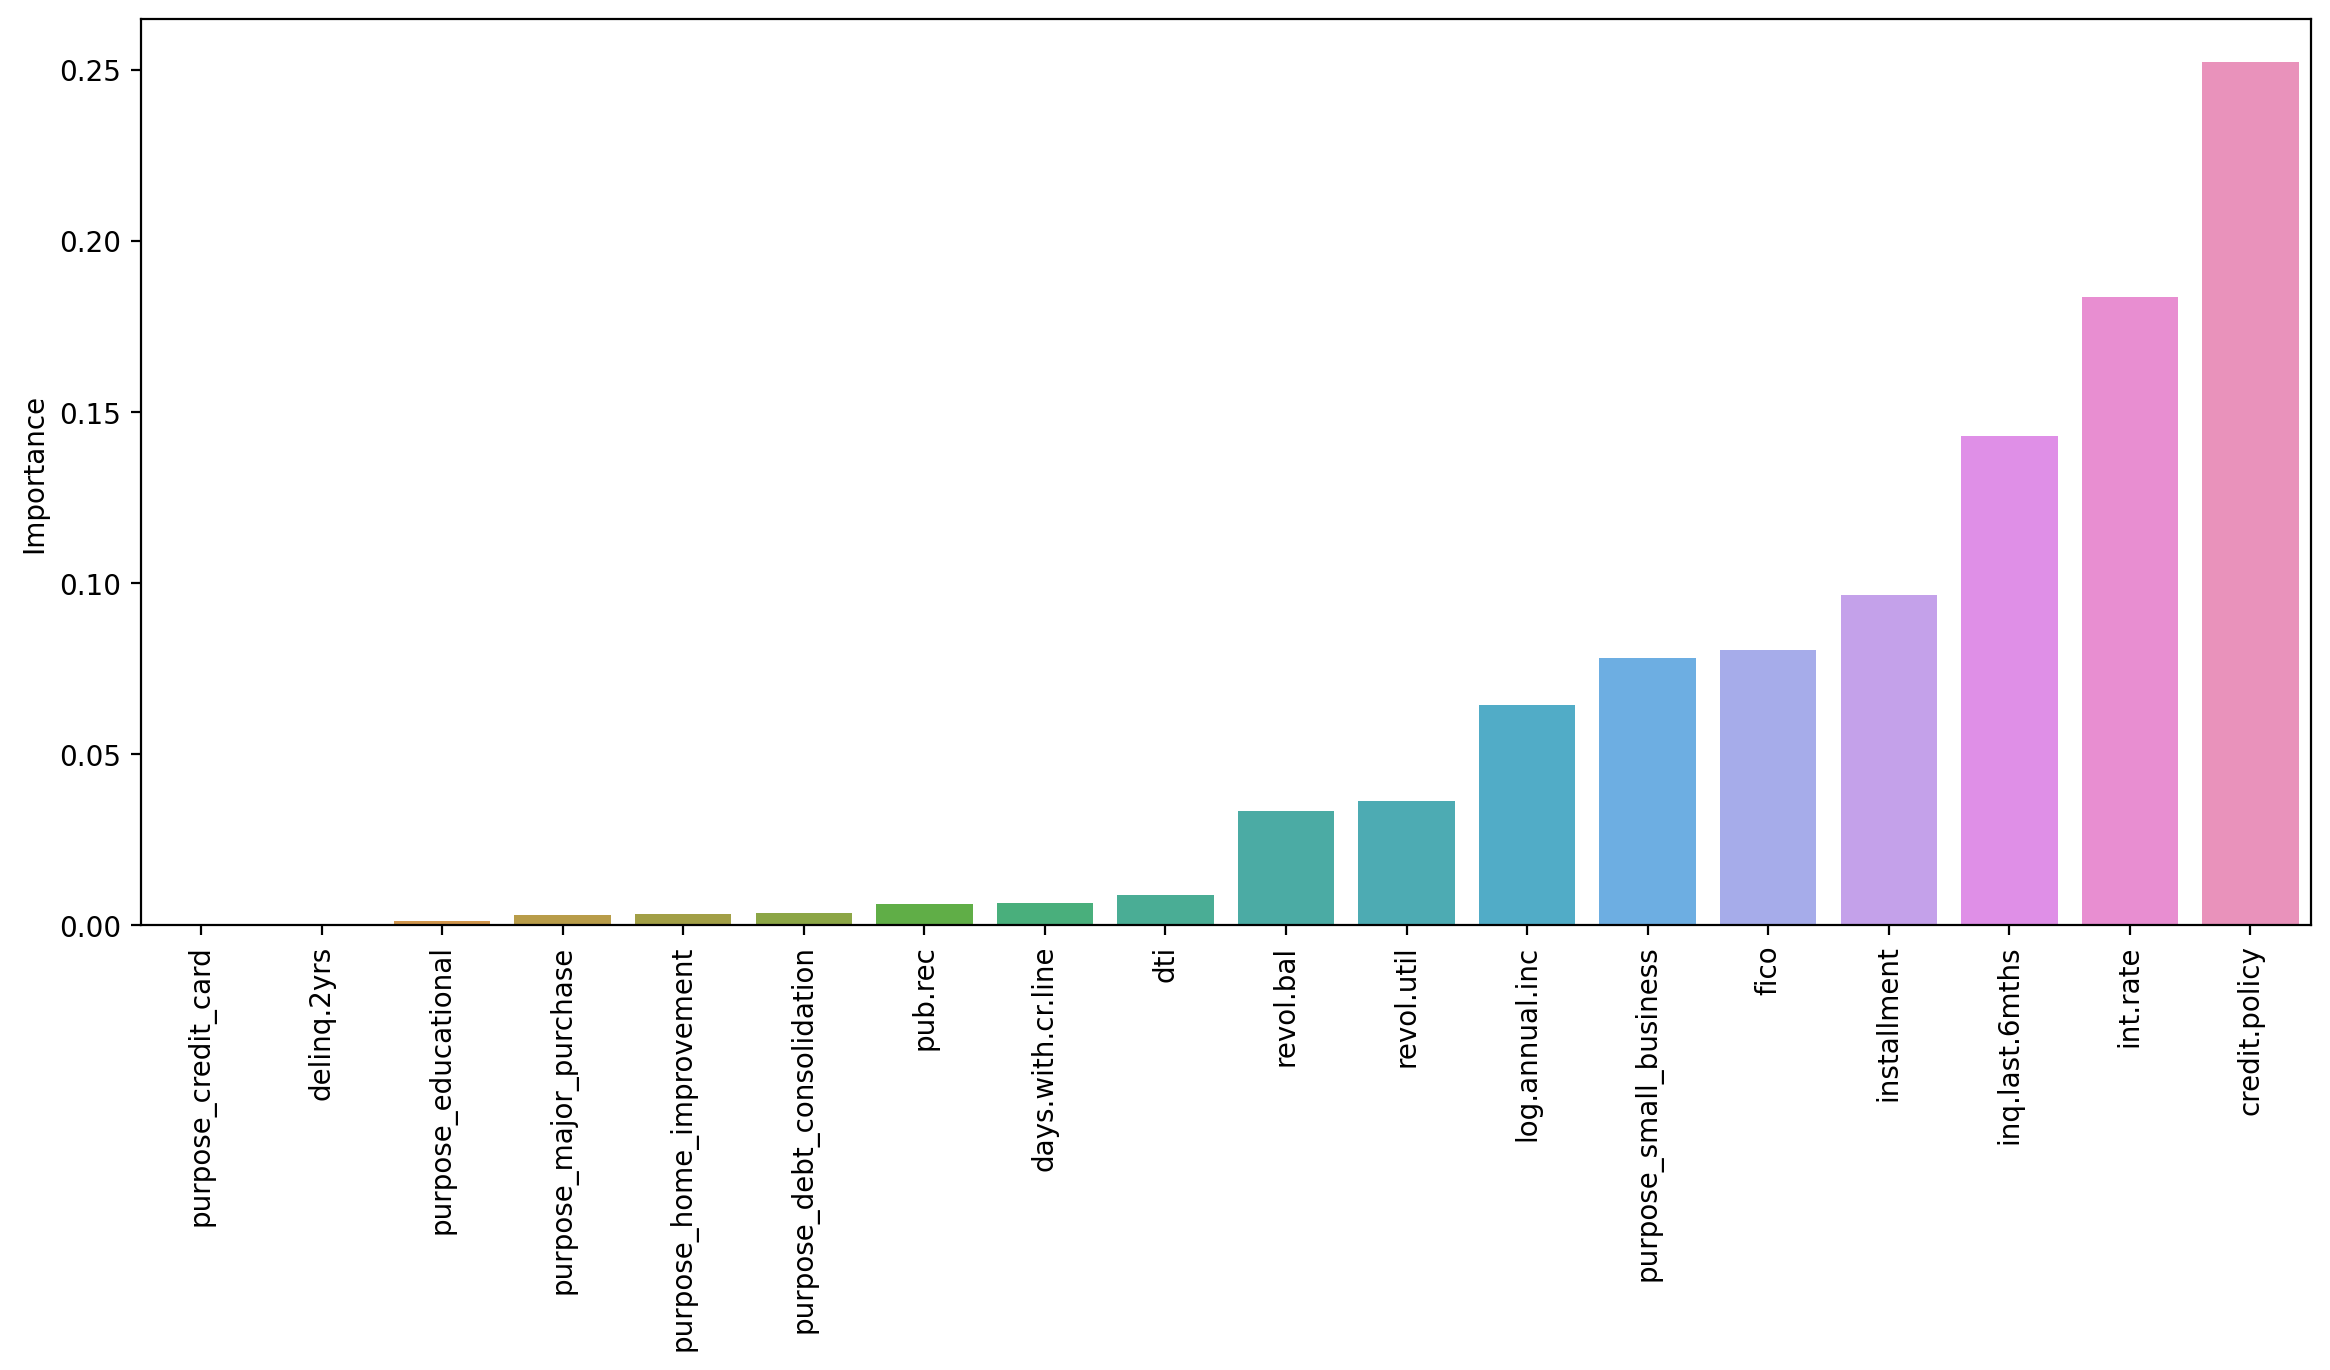

In [242]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);